<a href="https://colab.research.google.com/github/nv-github1/my-repo1/blob/master/data_viz_Titanic_NV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
#from plotly.subplots import make_subplots
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import jitter
from pathlib import Path

#open bokeh activation
output_notebook

sns.set_theme(context = 'notebook', style = 'whitegrid')

CSV_PATH = '/content/drive/MyDrive/datascience/titanic_for_viz_engineered_full.csv'
df = pd.read_csv(CSV_PATH)

df.head(10)
df.columns





Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone',
       'Title', 'CabinKnown', 'Deck', 'TicketPrefix', 'FareFill', 'FareBin',
       'AgeFill', 'AgeBin', 'SexCode', 'EmbarkedCode', 'ClassLabel',
       'FamilyType'],
      dtype='object')

In [121]:
def pick_column(df, *candidates):
  colmap = {c.lower(): c for c in df.columns}

  for name in candidates:
    if name.lower() in colmap:
      return colmap[name.lower()]
  return None



In [122]:
col_survived = pick_column(df,'Survived', 'survived','Survival','is_survived')
col_pclass = pick_column(df, 'Pclass','pclass','Class')
col_sex = pick_column(df, 'Sex','sex','Gender')
col_age = pick_column(df, 'Age', 'age')
col_fare = pick_column(df, 'Fare', 'fare')
col_embarked = pick_column(df, 'Embarked', 'embarked', 'Port')
col_sibsp = pick_column(df, 'SibSp', 'sibsp')
col_parch = pick_column(df, 'Parch', 'parch')
col_famsize = pick_column(df, 'FamilySize', 'familysize', 'family_size')


In [123]:
#construct familiy size if absent

if col_famsize is None and (col_sibsp is not None and col_parch is not None):
  df[Familysize_auto] = df[col_sibsp].fillna(0).astype(float) + df[col_parch].fillna(0).astype(float) + 1
  col_famsize = "FamilySize_auto"


In [124]:
renames = {}
if col_survived : renames[col_survived] = 'Survived'
if col_pclass: renames[col_pclass] = 'Pclass'
if col_sex: renames[col_sex] = 'Sex'
if col_age: renames[col_age] = 'Age'
if col_fare: renames[col_fare] = 'Fare'
if col_embarked: renames[col_embarked] = 'Embarked'
if col_famsize: renames[col_famsize] = 'FamilySize'

In [125]:
data = df.rename(columns = renames).copy()

for c in ['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize']:
  if c in data.columns:
    data[c] = pd.to_numeric(data[c], errors = 'coerce')


In [126]:
display_cols = [c for c in ["Survived", "Pclass", "Sex", "Age", "Fare", "FamilySize", "Embarked"] if c in data.columns]
data[display_cols].head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Embarked
0,0,3,male,22.0,7.2500,2,S
1,1,1,female,38.0,71.2833,2,C
2,1,3,female,26.0,7.9250,1,S
3,1,1,female,35.0,53.1000,2,S
4,0,3,male,35.0,8.0500,1,S


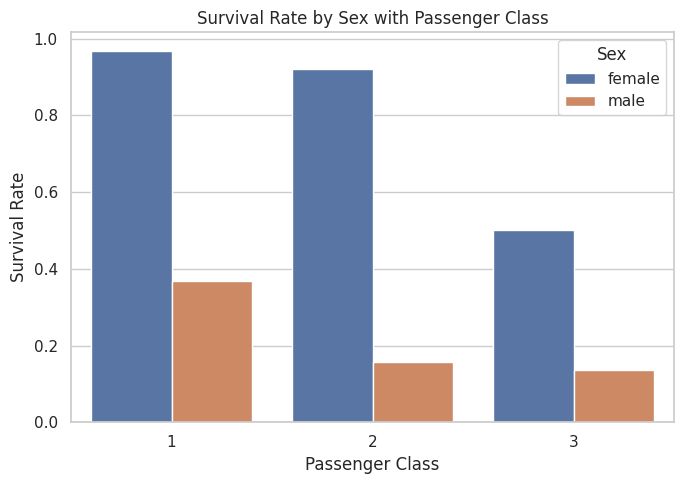

In [127]:
subset = data.dropna(subset = ['Survived', "Pclass","Sex"])
rate = subset.groupby(["Pclass","Sex"])["Survived"].mean().reset_index()
plt.figure(figsize = (7,5))
sns.barplot(data=rate, x = "Pclass", y ="Survived", hue ="Sex")
plt.title("Survival Rate by Sex with Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.tight_layout()
plt.show()

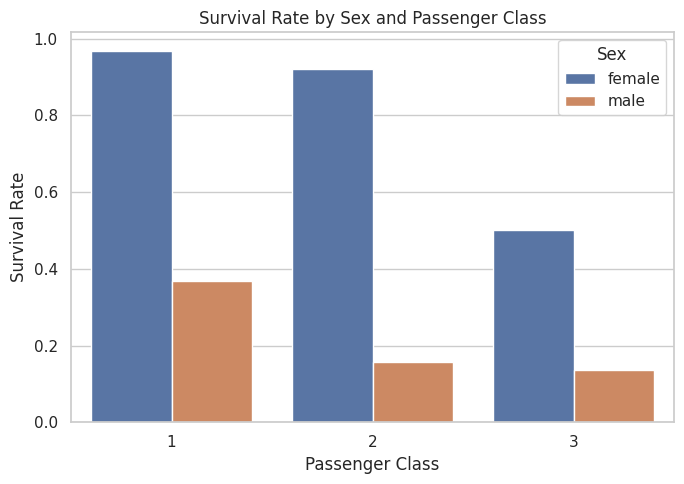

In [128]:
# Drop missing values for required columns
subset = data.dropna(subset=['Survived', 'Pclass', 'Sex'])

# Group by passenger class and sex, then compute mean survival rate
rate = subset.groupby(["Pclass", "Sex"])["Survived"].mean().reset_index()

# Plot
plt.figure(figsize=(7,5))
sns.barplot(data=rate, x="Pclass", y="Survived", hue="Sex")

plt.title("Survival Rate by Sex and Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")

plt.tight_layout()
plt.show()

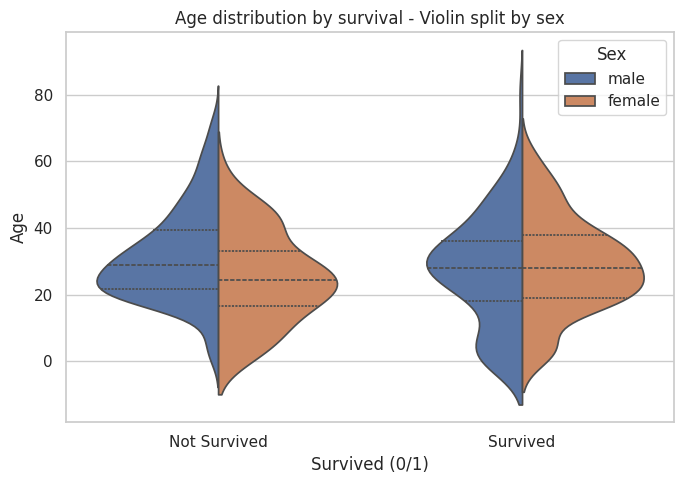

In [129]:
subset = data.dropna(subset = ['Survived', "Pclass","Sex"])
subset['Survived'] = subset['Survived'].astype(int).astype(str)

plt.figure(figsize = (7,5))

sns.violinplot(data=subset, x = "Survived", y ="Age", hue ="Sex", split = True, inner = "quartile")
plt.title("Age distribution by survival - Violin split by sex")
plt.xlabel("Survived (0/1)")
plt.xticks([0, 1], ["Not Survived", "Survived"])
plt.ylabel("Age")
plt.tight_layout()
plt.show()

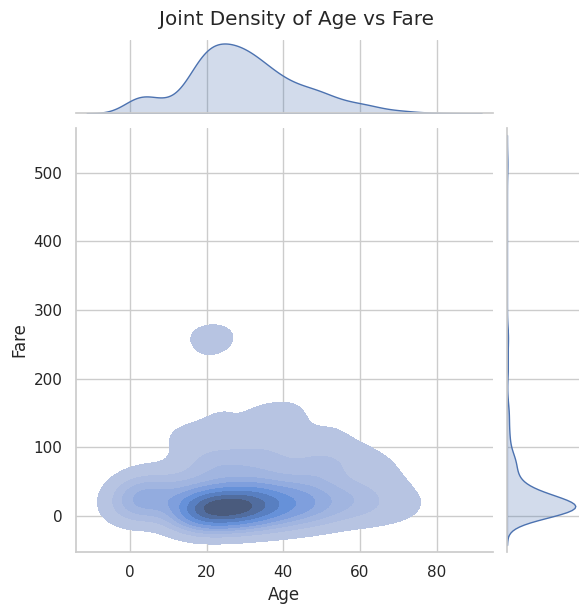

In [130]:
subset = data.dropna(subset=['Age','Fare'])
g = sns.jointplot(data=subset, x='Age', y='Fare', kind='kde', fill=True, height=6)
g.fig.suptitle('Joint Density of Age vs Fare',y=1.02)
plt.show()

# peaks show on top is most aged, on side shows cheapest fare

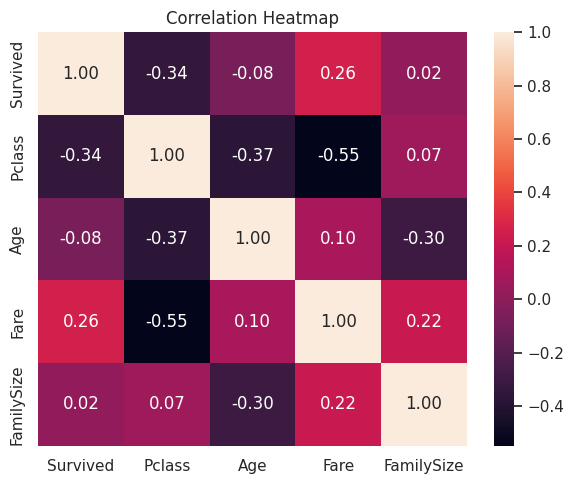

In [131]:
numcols = [c for c in ['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize'] if c in data.columns]
corr = data[numcols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


#It's a colorful table that shows how much different numbers in your data go together.
#If two things go up and down together, they have high correlation (close to +1).
#If one goes up when the other goes down, they have negative correlation (close to -1).
#If they don’t follow each other at all, the correlation is close to 0.
#
#🟥🟩🟦 Colors:
#🔴 Red / Orange = strong positive connection (both increase together)
#🔵 Blue / Purple = strong negative connection (one goes up, the other goes down)
#🟩 Greenish or White = no strong connection
#
#💡 Example:
#Survived and Fare: If the number is 0.26, it means people who paid more had a slightly better chance to survive.
#Survived and Pclass: If it's -0.33, it means lower class (higher number) had lower survival chances.
#Age and Survived: If it's near 0, age didn’t really matter much.
#









In [132]:
# using plotly charts
subset = data.dropna(subset=['Age','Fare']).copy()
subset['Survived_str'] = subset['Survived'].astype(int).astype(str) if "Survived" in subset else "NA"
size_col = "Familysize" if "Familysize" in subset.columns else None

fig = px.scatter(subset, x="Age", y='Fare', color='Survived_str',
                 size=size_col, hover_data=["Pclass", 'Sex', 'Embarked'] if 'Pclass' in subset and 'Sex' in subset and
                 'Embarked' in subset else None, title="Age vs Fare (Interactive)")
fig.update_layout(legend_title="Survived")
fig.show()

In [133]:
#plotly charts
subset = data.dropna(subset=["Fare", "Pclass"])
fig = px.box(subset, x="Pclass", y="Fare", points="suspectedoutliers", title="Fare by Passenger Class (Log Scale)")
fig.update_yaxes(type="log")
fig.show()

In [134]:
# using bokeh

subset = data.dropna(subset=["Embarked", "Survived"]).copy()
counts = subset.groupby(["Embarked", "Survived"]).size().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0).reset_index()
# Convert numeric column names (0, 1) to strings
props = props.rename(columns={0: "Not Survived", 1: "Survived"})
# Now use ColumnDataSource
source = ColumnDataSource(props)
p = figure(x_range=list(props["Embarked"]), height=350,
           title="Survival Proportions by Embarked (Bokeh)",
           toolbar_location=None, tools="hover",
           tooltips=[("Embarked", '@Embarked'),
                     ("Not Survived", "@{Not Survived}{0.00}"),
                     ("Survived", "@Survived{0.00}")])
p.vbar_stack(["Not Survived", "Survived"], x="Embarked", width=0.8,
             color=["#aaaaaa", "#1f77b4"], source=source,
             legend_label=['Not Survived', 'Survived'])
p.y_range.start = 0
p.y_range.end = 1
p.legend.location = "top_right"
show(p)


In [135]:
subset = data.dropna(subset=['Embarked', 'Survived']).copy()
counts = subset.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0).reset_index()

if 0 not in props.columns: props[0] = 0.0
if 1 not in props.columns: props[1] = 0.0

props = props.rename(columns={0: '0', 1: '1'})

source = ColumnDataSource(props)
p = figure(x_range=list(props['Embarked']), height=350, title='Survival Proportions by Embarked (Bokeh)',
           toolbar_location=None, tools="hover", tooltips=[('Embarked', '@Embarked'),
                                                            ('Not Survived', '@0{0.00}'), ('Survived', '@1{0.00}')])
p.vbar_stack(['0', '1'], x='Embarked', width=0.8, color=['#aaaaaa', '#1f77bc'], source=source, legend_label=['Not Survived', 'Survived'])
p.y_range.start = 0
p.y_range.end = 1.05
p.legend.location = 'top_right'
show(p)

In [136]:
subset = data.dropna(subset=['Embarked', 'Survived']).copy()
counts = subset.groupby(['Embarked', 'Survived']).size().unstack(fill_value=0)
props = counts.div(counts.sum(axis=1), axis=0).reset_index()

if 0 not in props.columns: props[0] = 0.0
if 1 not in props.columns: props[1] = 0.0

props = props.rename(columns={0: '0', 1: '1'})

source = ColumnDataSource(props)
p = figure(x_range=list(props['Embarked']), height=350, title='Survival Proportions by Embarked (Bokeh)',
           toolbar_location=None, tools="hover", tooltips=[('Embarked', '@Embarked'),
                                                            ('Not Survived', '@0{0.00}'), ('Survived', '@1{0.00}')])
p.vbar_stack(['0', '1'], x='Embarked', width=0.8, color=['#aaaaaa', '#1f77bc'], source=source, legend_label=['Not Survived', 'Survived'])
p.y_range.start = 0
p.y_range.end = 1.05
p.legend.location = 'top_right'
show(p)


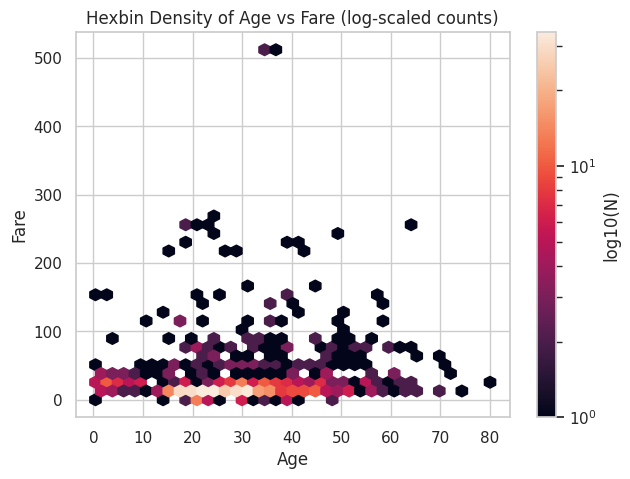

In [137]:
subset = data.dropna(subset=['Age', 'Fare'])
plt.figure(figsize=(7,5))
hb=plt.hexbin(subset['Age'],subset['Fare'],gridsize=35,bins='log')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Hexbin Density of Age vs Fare (log-scaled counts)')
cb=plt.colorbar(hb)
cb.set_label('log10(N)')
plt.tight_layout
plt.show()